<h1>Employee Data Preprocessing</h1>

<h2>1. Acquire the Dataset</h2>
<ul>
<li>Load the dataset Employee.csv into the environment</li>
</ul>

<h2>2. Import Required Libraries</h2>
<ul>
<li>numpy</li>
<li>pandas</li>
<li>matplotlib.pyplot</li>
<li>seaborn</li>
</ul>

<h2>3. Import the Dataset</h2>
<ul>
<li>Read the dataset using pd.read_csv()</li>
<li>Check shape (rows and columns)</li>
<li>Display first few rows</li>
</ul>

<h2>4. Data Exploration</h2>

<h3>✓ 4.1 Check Duplicate Rows</h3>
<ul>
<li>Identify duplicate rows</li>
<li>Remove duplicate rows</li>
<li>Reset index</li>
</ul>

<h3>✓ 4.2 Examine Dataset Structure</h3>
<ul>
<li>Use df.info() to check data types</li>
<li>Use df.describe() for summary statistics</li>
<li>Use df.nunique() for unique values in each column</li>
</ul>

<h3>✓ 4.3 Fix Inconsistent Categorical Values</h3>
<ul>
<li>Standardize inconsistent text values in Company</li>
<li>Standardize inconsistent text values in Place</li>
<li>Correct misspellings and unify category naming</li>
</ul>

<h2>5. Outlier Detection (IQR Method)</h2>

<h3>✓ 5.1 Age Outlier Check</h3>
<ul>
<li>Calculate Q1, Q3, and IQR for Age</li>
<li>Identify outliers using IQR</li>
</ul>

<h3>✓ 5.2 Salary Outlier Check</h3>
<ul>
<li>Calculate Q1, Q3, and IQR for Salary</li>
<li>Detect possible outliers</li>
</ul>

<h2>6. Handling Missing Values</h2>

<h3>✓ 6.1 Company Column</h3>
<ul>
<li>Fill missing values using mode</li>
</ul>

<h3>✓ 6.2 Age Column</h3>
<ul>
<li>Replace 0 values with NaN</li>
<li>Fill missing values with mean age</li>
</ul>

<h3>✓ 6.3 Salary Column</h3>
<ul>
<li>Replace 0 values with NaN</li>
<li>Fill missing values with mean salary</li>
</ul>

<h3>✓ 6.4 Place Column</h3>
<ul>
<li>Fill missing values using mode</li>
</ul>

<p><strong>→ After this, all missing values are handled.</strong></p>

<h2>7. Gender Column Cleaning</h2>
<ul>
<li>Convert gender values:</li>
<ul>
<li>0 → 'M'</li>
<li>1 → 'F'</li>
</ul>
</ul>

<h2>8. Drop Unnecessary Columns</h2>
<ul>
<li>Remove Country column since it has only one unique value</li>
</ul>

<h2>9. Categorical Encoding</h2>

<h3>✓ 9.1 One-Hot Encoding</h3>
<ul>
<li>Applied to categorical columns:</li>
<ul>
<li>Company</li>
<li>Place</li>
<li>Gender</li>
</ul>
<li>Using:</li>
<ul>
<li>OneHotEncoder</li>
<li>Dummy variable creation</li>
</ul>
</ul>

<h2>10. Feature Scaling</h2>
<ul>
<li>Apply StandardScaler to Age and Salary</li>
<li>Apply MinMaxScaler to Age and Salary</li>

</ul>

<h1>Problems in the Employee Dataset</h1>

<h2>Missing Values</h2>
<ul>
    <li>Company has missing values</li>
    <li>Age has missing values</li>
    <li>Salary has missing values</li>
    <li>Place has missing values</li>
</ul>

<h2>Duplicate Rows</h2>
<ul>
    <li>The dataset contains repeated entries that need to be removed</li>
</ul>

<h2>Inconsistent Categorical Values</h2>
<ul>
    <li>Company names are not consistent (example: "Infosys", "Infosys Pvt Ltd", "Tata Consultancy Services", "TCS")</li>
    <li>Place names may also contain inconsistent or misspelled entries</li>
</ul>

<h2>Incorrect or Invalid Numeric Values</h2>
<ul>
    <li>Age may contain zeros or unrealistic values</li>
    <li>Salary contains missing or invalid values</li>
</ul>

<h2>Outliers</h2>
<ul>
    <li>Age column can have extreme values</li>
    <li>Salary column contains unusually high or low values that should be checked</li>
</ul>

<h2>Irrelevant Column</h2>
<ul>
    <li>Country column has only one unique value ("India"), so it does not provide any useful information</li>
</ul>

<h2>Gender Column Needs Cleaning</h2>
<ul>
    <li>Gender is represented as 0 and 1, needs meaningful conversion or proper encoding</li>
</ul>

<h2>Categorical Columns Not Encoded</h2>
<ul>
    <li>Company, Place, and Gender need to be encoded (Label Encoding or One-Hot Encoding)</li>
</ul>

<h2>Numerical Columns Not Scaled</h2>
<ul>
    <li>Age and Salary need scaling if used for machine learning</li>
</ul>

# 1 Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2 Import data

In [2]:
df = pd.read_csv("Employee.csv")
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


# 3 Explore Data

In [3]:
df.shape 

(148, 6)

In [4]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [6]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [7]:
df.dtypes 

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [8]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


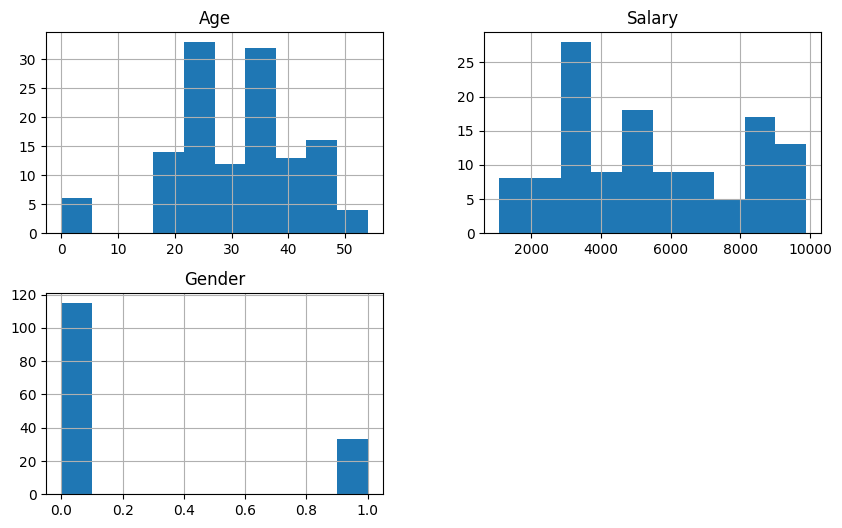

In [9]:
df.hist(figsize=(10,6))
plt.show()

In [10]:
for col in df.columns:
    print(col, ":", df[col].nunique())

Company : 6
Age : 29
Salary : 40
Place : 11
Country : 1
Gender : 2


# 4 Remove DUPLICATE ROWS

In [11]:
df.duplicated().sum()


4

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(144, 6)

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.isnull().sum()

Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

# 5 Fix Inconsistent Categorical Values

In [15]:
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [58]:
# Clean the Company Column
df['Company'] = df['Company'].replace({
    'Infosys Pvt Ltd': 'Infosys',
    'Infosys Pvt Lmt': 'Infosys',
    'Tata Consultancy Services': 'TCS',
    'CTS': 'Cognizant',
    'Congnizant': 'Cognizant'
})

In [59]:
df['Company'].unique()

array(['TCS', 'Infosys', 'Cognizant'], dtype=object)

In [18]:
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [19]:
# Clean Place names (spelling mistakes / inconsistent labels)
df['Place'] = df['Place'].replace({
    'Hydrabad': 'Hyderabad',
    'Pondichery': 'Pondicherry',
    'Cochin': 'Kochi'
})

In [20]:
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Kochi',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [21]:
df['Gender'].unique()

array([0, 1], dtype=int64)

# 6 Remove and impute Missing Values

In [22]:
df.isnull().sum()

Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [23]:
df.isnull().sum()

Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [25]:
df['Company'].fillna(df['Company'].mode()[0], inplace=True)


In [26]:
df.isna().sum()

Company     0
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [27]:
df[df['Age']==0]

,Company,Age,Salary,Place,Country,Gender
87,Infosys,0.0,3030.0,Calcutta,India,0
91,TCS,0.0,3045.0,Delhi,India,0
100,Cognizant,0.0,2034.0,Podicherry,India,0
106,TCS,0.0,9024.0,Chennai,India,1
110,Infosys,0.0,3234.0,Mumbai,India,0
120,Cognizant,0.0,1234.0,Calcutta,India,0


In [33]:
# Replace zero age with NaN → then fill with mean
df['Age'].replace(0, np.nan)
df['Age'].fillna(round(df['Age'].mean()))

0      20.0
1      30.0
2      35.0
3      40.0
4      23.0
       ... 
139    22.0
140    33.0
141    44.0
142    33.0
143    22.0
Name: Age, Length: 144, dtype: float64

In [34]:
df.isna().sum()

Company     0
Age         0
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [36]:
# Replace zero salary with NaN → then fill with mean
df['Salary'].replace(0, np.nan)
df['Salary'].fillna(round(df['Salary'].mean()))

0      5283.0
1      5283.0
2      2300.0
3      3000.0
4      4000.0
        ...  
139    8202.0
140    9024.0
141    4034.0
142    5034.0
143    8202.0
Name: Salary, Length: 144, dtype: float64

In [37]:
df.isna().sum()

Company     0
Age         0
Salary      0
Place      14
Country     0
Gender      0
dtype: int64

In [39]:
df['Place'].fillna(df['Place'].mode()[0])

0       Chennai
1        Mumbai
2      Calcutta
3         Delhi
4        Mumbai
         ...   
139      Mumbai
140    Calcutta
141       Delhi
142      Mumbai
143       Kochi
Name: Place, Length: 144, dtype: object

In [40]:
df.isna().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [42]:
df.shape

(144, 6)

In [52]:
df.describe()

,Age,Salary
count,144.000000,144.000000
mean,32.034722,5283.395833
std,8.234681,2368.350171
min,17.000000,1089.000000
25%,23.750000,3045.000000
50%,32.000000,5283.000000
75%,36.000000,7084.000000
max,54.000000,9876.000000


# 7 Detect and Remove Outliers

In [43]:
# compute quartiles & IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# fences
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# drop outliers (keep rows inside the fences)
df = df[(df['Salary'] >= lower) & (df['Salary'] <= upper)]

# tidy index
df.reset_index(drop=True, inplace=True)


In [44]:
# compute quartiles and IQR
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

# define lower/upper fences
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# keep only rows inside the fences (== remove outliers)
df = df[(df['Age'] >= lower) & (df['Age'] <= upper)]

#tidy up the index
df.reset_index(drop=True, inplace=True)

#no outliers detected using IQR

<Figure size 640x480 with 0 Axes>

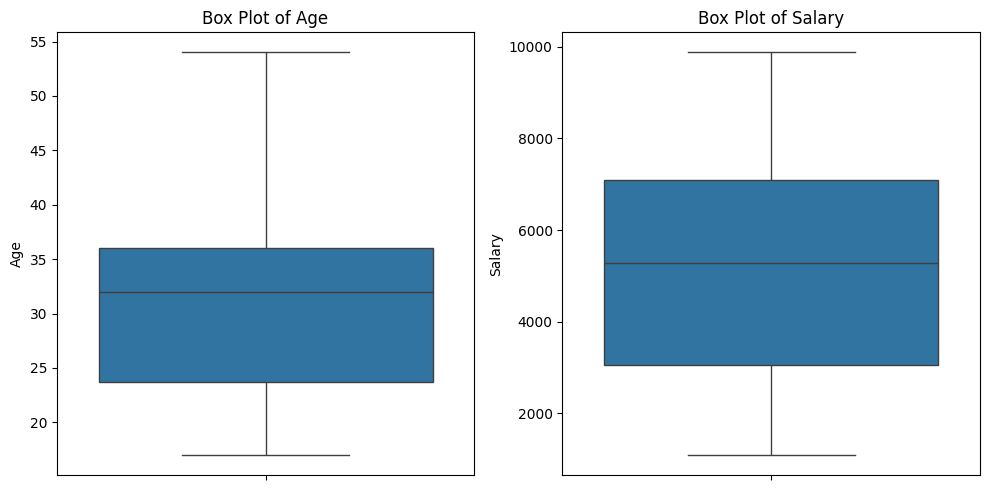

In [41]:
plt.tight_layout()
fig2, axes2 = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=df, y='Age', ax=axes2[0])
axes2[0].set_title('Box Plot of Age')
sns.boxplot(data=df, y='Salary', ax=axes2[1])
axes2[1].set_title('Box Plot of Salary')
plt.tight_layout()
plt.show()


# 8 MODIFY GENDER COLUMN

In [48]:
# Convert 0/1 → M/F
df['Gender'] = df['Gender'].replace({0: 'M', 1: 'F'})
print(df['Gender'].value_counts())

Gender
M    112
F     32
Name: count, dtype: int64


In [50]:
print(df.sample(3))

    Company   Age  Salary   Place Country Gender
1   Infosys  30.0  5283.0  Mumbai   India      M
25  Infosys  23.0  8943.0  Mumbai   India      F
35      TCS  35.0  9024.0  Mumbai   India      F


# 9 DROP USELESS COLUMNS

In [51]:
# Country column has only 1 value = "India"
df.drop('Country', axis=1, inplace=True)

# 10 OneHotEncoding and Label Encoder

In [60]:
df['Company'].unique()

array(['TCS', 'Infosys', 'Cognizant'], dtype=object)

In [61]:
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Kochi',
       'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'], dtype=object)

In [62]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [63]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
df_array=ohe.fit_transform(df[['Company','Place','Gender']]).toarray()
df_array

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [64]:
ohe.categories_

[array(['Cognizant', 'Infosys', 'TCS'], dtype=object),
 array(['Bhopal', 'Calcutta', 'Chennai', 'Delhi', 'Hyderabad', 'Kochi',
        'Mumbai', 'Nagpur', 'Noida', 'Podicherry', 'Pune'], dtype=object),
 array(['F', 'M'], dtype=object)]

In [85]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# # Apply Label Encoding
# df['Company_LE'] = le.fit_transform(df['Company'])
# df['Place_LE'] = le.fit_transform(df['Place'])
# df['Gender_LE'] = le.fit_transform(df['Gender'])

# # Create a new dataset with only encoded columns + numerical columns
# new_df = df[['Age', 'Salary', 'Company_LE', 'Place_LE', 'Gender_LE']]

# # Show the new dataset
# print(new_df.head())


# 11 Standardization

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
data=df.iloc[ : ,[1,2]]
data.head(2)

,Age,Salary
0,20.0,5283.0
1,30.0,5283.0


In [83]:
scaled_df=scaler.fit_transform(data)

In [76]:
print(scaled_df.mean(axis=0))

[8.17247504e-17 1.03312420e-16]


In [77]:
scaled_df.var(axis=0)

array([1., 1.])

In [79]:
#convert it into dataframe-table format
scaled_data_set=pd.DataFrame(scaled_df,columns=data.columns)
scaled_data_set.head(2)

,Age,Salary
0,-1.466569,-0.000168
1,-0.247954,-0.000168


# 12 MinMax Scaler (Normalization)

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
sca_df=scaler.fit_transform(data)

In [81]:
scaler.data_min_

array([  17., 1089.])

In [82]:
scaler.data_max_

array([  54., 9876.])